## FAMA French Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import scipy.stats as ss

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
AAPL = pd.read_csv('AAPL_New.csv')
AAPL.set_index('Date')
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1/4/2016,105.370003,102.000000,102.610001,105.349999,67649400,98.446655
1,1/5/2016,105.849999,102.410004,105.750000,102.709999,55791000,95.979675
2,1/6/2016,102.370003,99.870003,100.559998,100.699997,68457400,94.101387
3,1/7/2016,100.129997,96.430000,98.680000,96.449997,81094400,90.129868
4,1/8/2016,99.110001,96.760002,98.550003,96.959999,70798000,90.606438


In [3]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'], infer_datetime_format=True)
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,105.370003,102.000000,102.610001,105.349999,67649400,98.446655
1,2016-01-05,105.849999,102.410004,105.750000,102.709999,55791000,95.979675
2,2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400,94.101387
3,2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400,90.129868
4,2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000,90.606438


In [4]:
AAPL['OpenClose']= (AAPL['Open']+ AAPL['Close'])/2
AAPL['HighLow'] = (AAPL['High']+ AAPL['Low'])/2

In [5]:
ADS = pd.read_excel('ADS.xlsx')
#Change name and format of date-column
ADS = ADS.rename(columns={'Unnamed: 0': 'Date'})
ADS['Date'] = pd.to_datetime(ADS['Date'],  format = "%Y%m%d")
ADS.index = ADS['Date']
ADS.drop(ADS.columns[0], axis=1,inplace=False)

#Drop Days in YYYY-MM-DD
ADS.index = ADS.index.map(lambda x: x.strftime('%Y-%m-%d'))

#Time Slice
ADS.tail()
ADS = ADS.loc['2016-04-01':'2019-08-30']
#print(ADS)

FF3 = pd.read_csv('F-F_Research_Data_Factors_daily.csv',skiprows=4)

T = FF3.shape[0]
#print(T)

#Drop last row of data - String
FF3 = FF3[:T-2]

#Convert YYYYMM into Date
FF3['Unnamed: 0'] = pd.to_datetime(FF3['Unnamed: 0'],  format = "%Y%m%d")
FF3.index = FF3['Unnamed: 0']
FF3.drop(FF3.columns[0], axis=1,inplace=False)

#Drop Days in YYYY-MM-DD
FF3.index = FF3.index.map(lambda x: x.strftime('%Y-%m-%d'))

FF3.tail()

#Time Slice
FF3 = FF3.loc['2016-04-01':'2019-08-30']
FF3 = FF3.rename(columns={'Unnamed: 0': 'Date'})
#print(FF3)
AAPL = pd.read_csv('AAPL_New.csv')
AAPL['Date'].dtype
AAPL['Date'] = pd.to_datetime(AAPL['Date'], infer_datetime_format=True)
AAPL['Date'] = pd.to_datetime(AAPL['Date'],  format = "%Y%m%d")
AAPL.index = AAPL['Date']
AAPL.drop(AAPL.columns[0], axis=1,inplace=False)

#Drop Days in YYYY-MM-DD
AAPL.index = AAPL.index.map(lambda x: x.strftime('%Y-%m-%d'))

AAPL.tail()
AAPL = AAPL.loc['2016-04-01':'2019-08-30']
#print(AAPL)
T = FF3.shape[0]

#Merge three data
temp = pd.merge(AAPL,FF3)
new_Data = pd.merge(temp,ADS)
#print(new_Data)
new_Data['open_tmr'] = new_Data['Open'].shift(-1)
#Use yesterday's ADS-index, FF3, Close-price to predict today's Open-price
Y = new_Data[['open_tmr']].as_matrix()[:-1]
X = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index_102419']].as_matrix()[1:]
N = X.shape
#print(N,'+',Y.shape)
#print(Y)
new_Data.head()
#temp.head()

C:\Users\kaila\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\kaila\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,Date,High,Low,Open,Close,Volume,Adj Close,Mkt-RF,SMB,HML,...,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419,open_tmr
0,2016-04-01,110.000000,108.199997,108.779999,109.989998,25874000,103.340347,0.64,-0.25,-0.62,...,-0.579355,-0.579355,-0.579355,-0.579355,-0.579355,-0.579355,-0.579355,-0.579355,-0.579355,110.419998
1,2016-04-04,112.190002,110.269997,110.419998,111.120003,37356200,104.402031,-0.41,-0.25,-0.74,...,-0.554354,-0.554354,-0.554354,-0.554354,-0.554354,-0.554354,-0.554354,-0.554354,-0.554354,109.510002
2,2016-04-05,110.730003,109.419998,109.510002,109.809998,26578700,103.171249,-0.94,-0.08,-0.36,...,-0.547185,-0.547185,-0.547185,-0.547185,-0.547185,-0.547185,-0.547185,-0.547185,-0.547185,110.230003
3,2016-04-06,110.980003,109.199997,110.230003,110.959999,26404100,104.251701,1.14,0.17,-0.82,...,-0.540802,-0.540802,-0.540802,-0.540802,-0.540802,-0.540802,-0.540802,-0.540802,-0.540802,109.949997
4,2016-04-07,110.419998,108.120003,109.949997,108.540001,31801900,101.978004,-1.23,-0.05,-0.35,...,-0.535204,-0.535204,-0.535204,-0.535204,-0.535204,-0.535204,-0.535204,-0.535204,-0.535204,108.910004


In [6]:
def fama(X,Y):
    T = FF3.shape[0]
    N = X.shape
    'OLS REGRESSION STARTS'
    'LINEAR REGRESSION of Y: T x 1 on'
    'Regressors X: T x N'
    invXX = np.linalg.inv(X.transpose()@X)
    #print(invXX.shape)
    'OLS_estimates for coefficents: X x 1'
    beta_hat = invXX@X.transpose()@Y

    'Predictive value of Y using OLS'
    y_hat = X@beta_hat
    'Residuals from OLS'
    residuals = Y - y_hat
    'Variance of Residuals'
    sigma2 = (1/T)*residuals.transpose()@residuals
    'standard deviation of Y or residuals'
    sigma = np.sqrt(sigma2)
    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (sigma2)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])

    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat
    p_val = 1-ss.norm.cdf(t_stat)

    'Test of Joint Significance of Model'
    F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
    (residuals.transpose()@residuals/(T-N[1]))
    p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
    
    rmse = np.sqrt(np.mean((y_hat-Y)**2))
    
    return beta_hat,y_hat


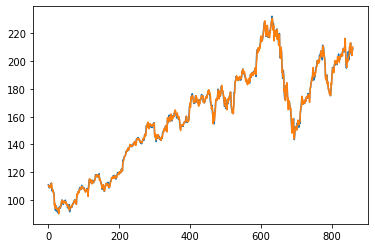

In [7]:
y_hat = fama(X,Y)[1]
plt.plot(y_hat)
plt.plot(Y)

In [8]:
def bootstrap():
    T = 250
    #print(T)
    N = X.shape[0]
    #print(N)
    
    yhat_ar1 = np.zeros(N-(T+1))
    window = 200
    num_boost = 500 # increase
    
    for t in range(T+1,N):
        X_train = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index_102419']][t-window:t-1]
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = AAPL['Open'][t-window:t-1].values
       # print(X_train.shape)
       # print(Y_train.shape)
       
        X_pred = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index_102419']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])

        yhat_train = fama(X_train , Y_train)[1]
        res_train = Y_train - yhat_train
       
        y_pred_all = np.zeros(num_boost)
       
        for i in range (0,num_boost):
            err = np.random.choice(res_train,(window-1, ),replace = True)
            y_bstr = yhat_train + err
            beta_bstr = fama(X_train,y_bstr)[0]
           # print(X_pred.shape)
           # print(beta_bstr.shape)

            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i] = y_pred_bstr
           
        y_pred_ar1 = y_pred_all.mean()
       
        yhat_ar1[t-(T+1)] = y_pred_ar1
   
   
    rmse_ar1 = np.sqrt(np.mean((Y - yhat_ar1)**2))
   
    return yhat_ar1,rmse_ar1

In [9]:
rmse = bootstrap()[1]
rmse

47.06882756105782